# Heatmap: Visualizing a Graph

This example shows how to visualize graphs using a heatmap.

In [1]:
import graspologic
import numpy as np

/home/runner/.cache/pypoetry/virtualenvs/graspologic-pkHfzCJ8-py3.10/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Plotting Simple Graphs using heatmap

A 2-block Stochastic Block Model is defined as below:

\begin{align*}
P = \begin{bmatrix}0.8 & 0.2 \\
0.2 & 0.8 
\end{bmatrix}
\end{align*}

In simple cases, the model is unweighted. Below, we plot an unweighted SBM.

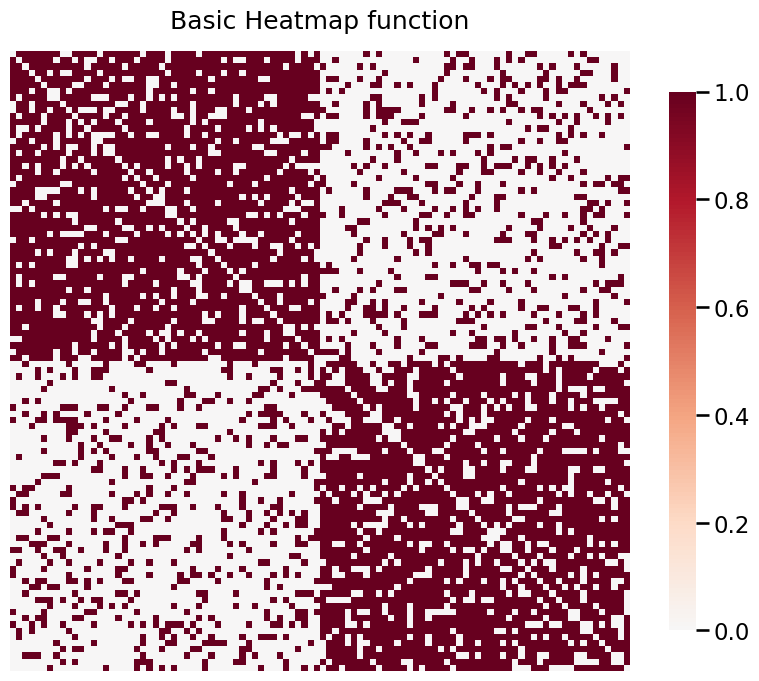

In [2]:
from graspologic.simulations import sbm
from graspologic.plot import heatmap

n_communities = [50, 50]
p = [[0.8, 0.2], 
     [0.2, 0.8]]

A, labels = sbm(n_communities, p, return_labels=True)
heatmap(A, title="Basic Heatmap function");

## Plotting with Hierarchy Labels

If we have labels, we can use them to show communities on a Heatmap.

<Axes: >

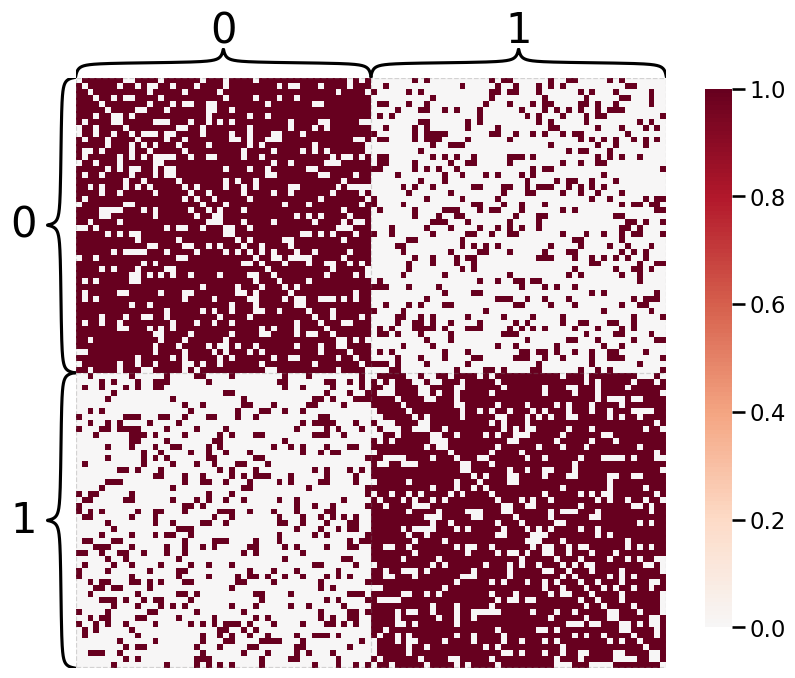

In [3]:
heatmap(A, inner_hier_labels=labels)

We can plot outer hierarchy labels in addition to inner hierarchy labels.

<Axes: >

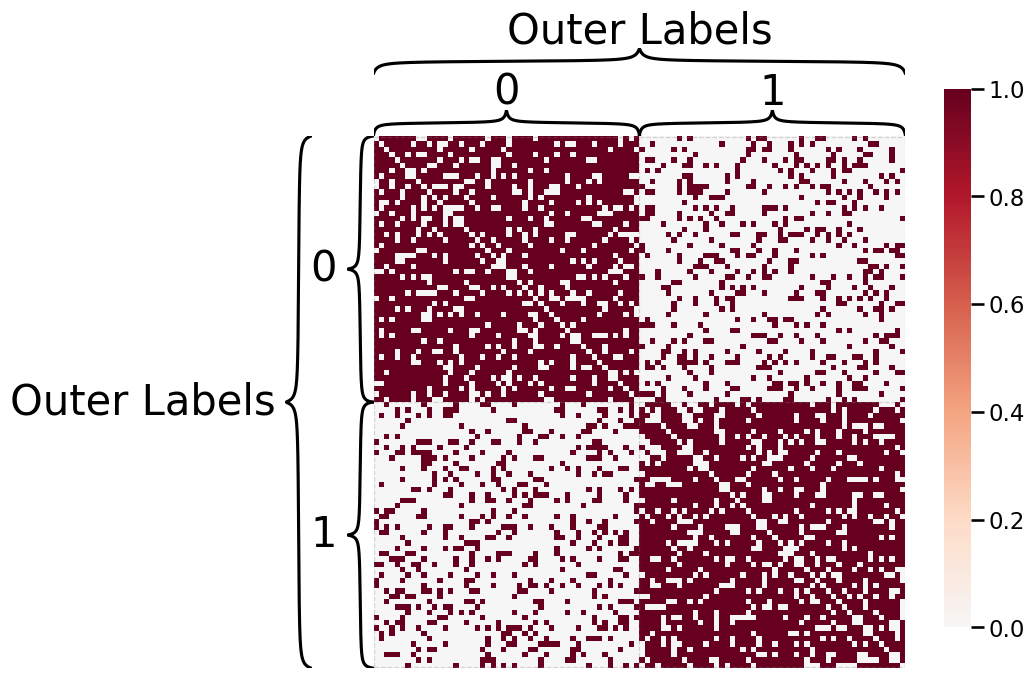

In [4]:
outer_labels = ["Outer Labels"] * 100
heatmap(A, inner_hier_labels=labels,
        outer_hier_labels=outer_labels)

## Weighted SBMs

We can also use heatmap when our graph is weighted. Here, we generate two weighted SBMs where the weights are distributed from a Poisson(3) and Normal(5, 1).

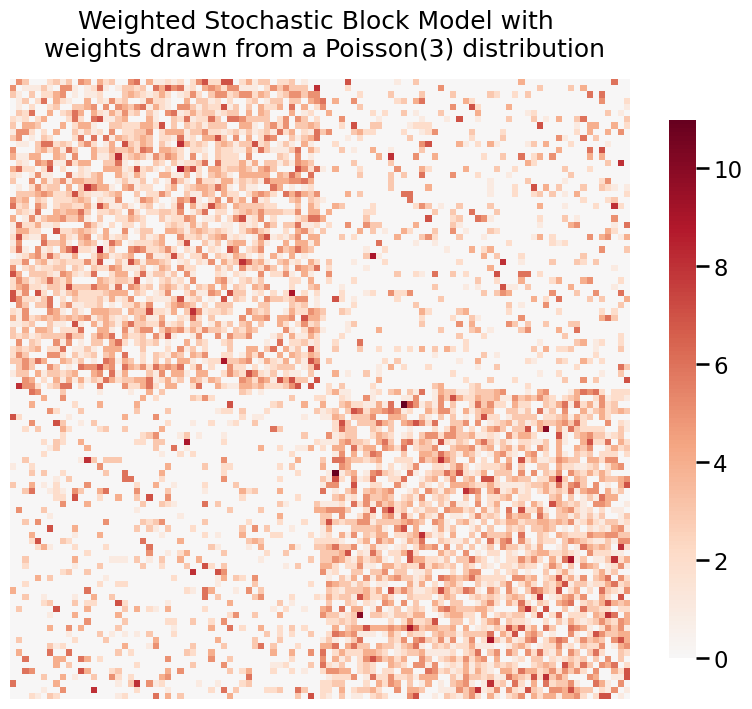

In [5]:
# Draw weights from a Poisson(3) distribution
wt = np.random.poisson
wtargs = dict(lam=3)
A_poisson= sbm(n_communities, p, wt=wt, wtargs=wtargs)

# Plot
title = 'Weighted Stochastic Block Model with \n weights drawn from a Poisson(3) distribution'
fig= heatmap(A_poisson, title=title)

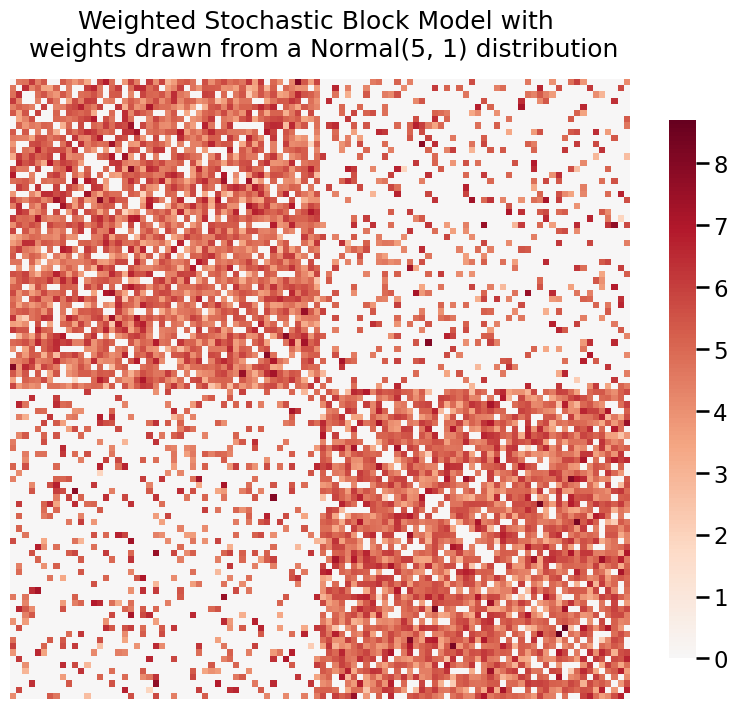

In [6]:
# Draw weights from a Normal(5, 1) distribution
wt = np.random.normal
wtargs = dict(loc=5, scale=1)
A_normal = sbm(n_communities, p, wt=wt, wtargs=wtargs)

# Plot
title = 'Weighted Stochastic Block Model with \n weights drawn from a Normal(5, 1) distribution'
fig = heatmap(A_normal, title=title)

### Colormaps

You can change colormaps. See [here](https://matplotlib.org/tutorials/colors/colormaps.html) for a list of colormaps.

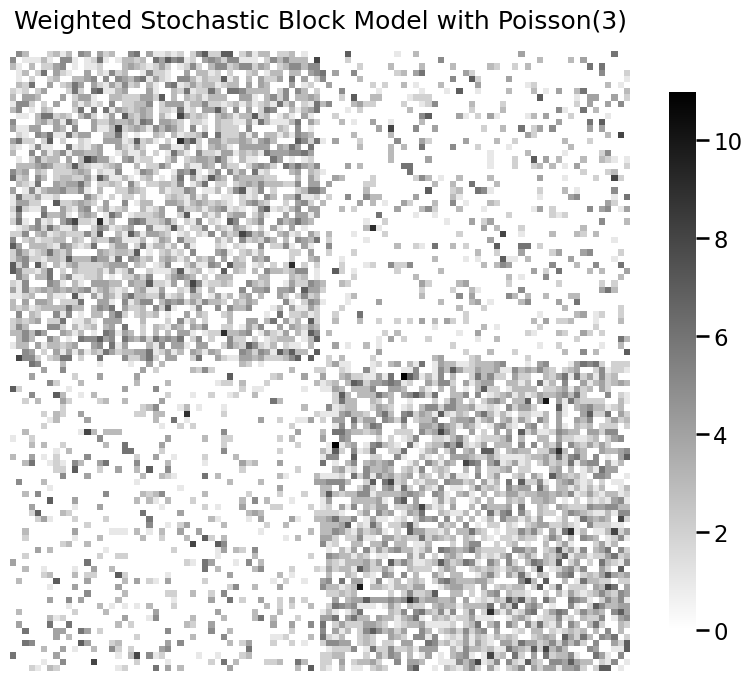

In [7]:
title = 'Weighted Stochastic Block Model with Poisson(3)'
fig = heatmap(A_poisson, title=title, transform=None, cmap="binary", center=None)

## Data transformations

When your graphs have values that span a large range, it is often useful to transform the data in order to visualize it properly. Below, we use a real graph which is estimated from the a structural MRI scan. The data is provided by [HNU1](http://dx.doi.org/10.15387/fcp_indi.corr.hnu1). 

The data ranges from 0 to 44813, and visualizing without a transformation will emphasize the large weights. Both log and pass-to-ranks transforms provide better visualizations of the graph.

In [8]:
G = np.load('./data/sub-0025427_ses-1_dwi_desikan.npy')

print((np.min(G), np.max(G)))

(0.0, 44813.0)


### Without transform

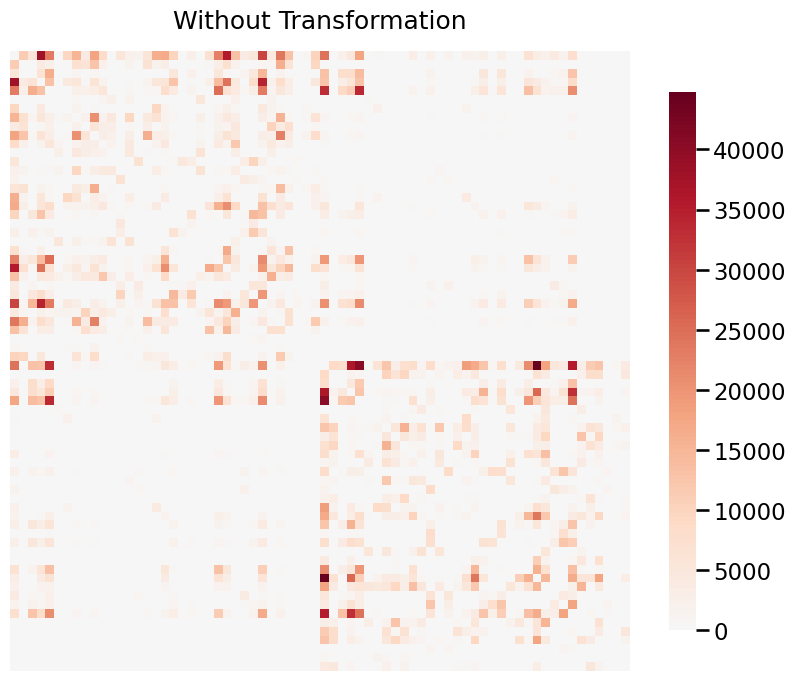

In [9]:
title = 'Without Transformation'
fig= heatmap(G, title=title, transform=None)

### With log transform

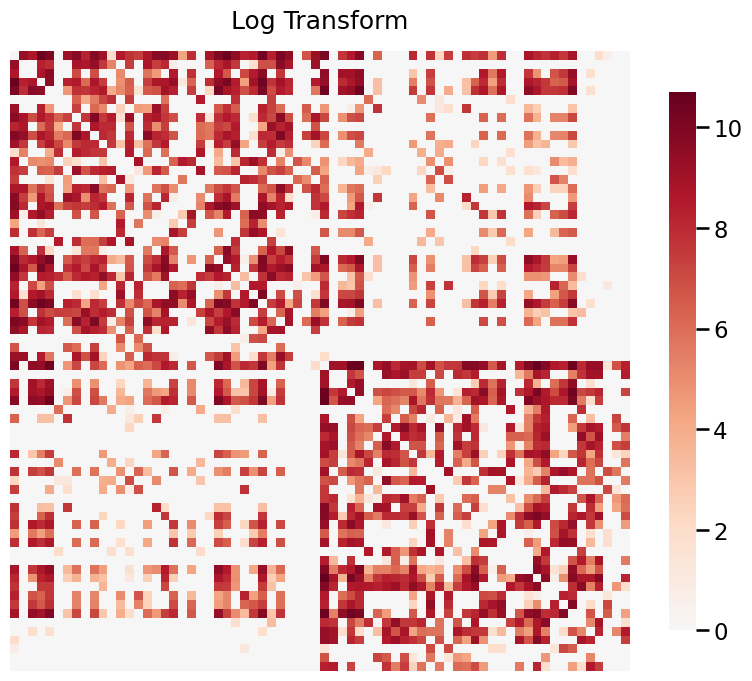

In [10]:
title = 'Log Transform'
fig= heatmap(G, title=title, transform='log')

### With pass to ranks

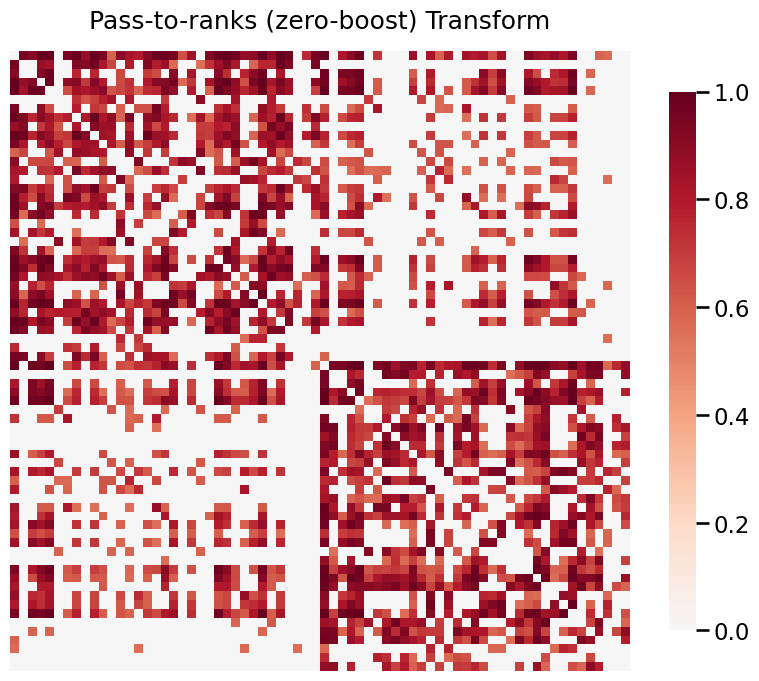

In [11]:
title = 'Pass-to-ranks (zero-boost) Transform'
fig= heatmap(G, title=title, transform='zero-boost')